## Day 50 Lecture 2 Assignment

In this assignment, we will apply various methods of internal evaluation to the results of K-Means clustering on a dataset containing the results of a survey on financial wellbeing.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

This dataset contains the results of a survey on a financial wellbeing conducted by the US Consumer Finance Protection Bureau that were published in October 2017. This dataset has a large number of columns, most of which correspond to specific questions on the survey. These codebook for translating the column names to questions can be found here:

https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

Load the dataset.

In [ ]:
# answer goes here
url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/financial_wellbeing.csv'

df = pd.read_csv(url)

As we did in the previous assignment, we will only use the score columns. Filter the columns of the dataset to only include these columns.

In [ ]:
# answer goes here
X = df.filter(like="score")

X.head()

,FWBscore,FSscore,LMscore,KHscore
0,55,44,3,1.267
1,51,43,3,-0.570
2,49,42,3,-0.188
3,49,42,2,-1.485
4,49,42,1,-1.900


Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [ ]:
# answer goes here
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

Create an elbow plot showing how the SSE changes with respect to the number of clusters in K-Means. Allow K to vary from 2 to 30. Does a clear "elbow" emerge from the plot?

0       1
1       0
2       1
3       0
4       0
       ..
6389    1
6390    0
6391    0
6392    0
6393    0
Name: clusters, Length: 6394, dtype: int32
0       0
1       0
2       0
3       2
4       2
       ..
6389    1
6390    2
6391    2
6392    2
6393    2
Name: clusters, Length: 6394, dtype: int32
0       2
1       2
2       2
3       1
4       1
       ..
6389    0
6390    3
6391    3
6392    1
6393    1
Name: clusters, Length: 6394, dtype: int32
0       2
1       2
2       2
3       1
4       1
       ..
6389    4
6390    3
6391    3
6392    1
6393    1
Name: clusters, Length: 6394, dtype: int32
0       1
1       1
2       1
3       5
4       2
       ..
6389    0
6390    3
6391    3
6392    5
6393    5
Name: clusters, Length: 6394, dtype: int32
0       3
1       0
2       0
3       1
4       2
       ..
6389    6
6390    4
6391    4
6392    1
6393    1
Name: clusters, Length: 6394, dtype: int32
0       1
1       7
2       7
3       3
4       4
       ..
6389    2
6390    5
63

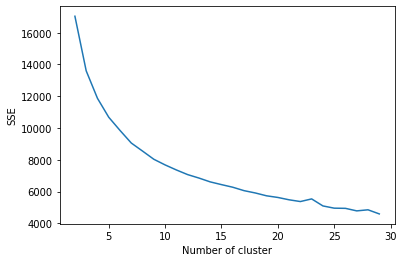

In [ ]:
# answer goes here
sse = {}

for k in range(2, 30):

    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_scaled)

    X_scaled["clusters"] = kmeans.labels_

    print(X_scaled["clusters"])

    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()

plt.plot(list(sse.keys()), list(sse.values()))

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()




Create a silhouette plot for the results of K-Means, again with K varying from 2 to 30. What is the optimal number of clusters according to the silhouette method? Is this consistent with the output of the elbow plot?

In [ ]:
# answer goes here

